In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
df= pd.read_csv("C:/Users/DELL/Downloads/intrusion1.csv")

In [3]:
df.describe()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


In [4]:
df.isnull().sum()

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

In [5]:
df.columns.tolist()

['session_id',
 'network_packet_size',
 'protocol_type',
 'login_attempts',
 'session_duration',
 'encryption_used',
 'ip_reputation_score',
 'failed_logins',
 'browser_type',
 'unusual_time_access',
 'attack_detected']

In [6]:
df.dtypes

session_id              object
network_packet_size      int64
protocol_type           object
login_attempts           int64
session_duration       float64
encryption_used         object
ip_reputation_score    float64
failed_logins            int64
browser_type            object
unusual_time_access      int64
attack_detected          int64
dtype: object

In [7]:
df['protocol_type'] = df['protocol_type'].astype('string')
df['browser_type'] = df['browser_type'].astype('string')
df.dtypes

session_id                     object
network_packet_size             int64
protocol_type          string[python]
login_attempts                  int64
session_duration              float64
encryption_used                object
ip_reputation_score           float64
failed_logins                   int64
browser_type           string[python]
unusual_time_access             int64
attack_detected                 int64
dtype: object

In [8]:
df['encryption_used'] = df['encryption_used'].fillna(df['encryption_used'].mode()[0] )

In [9]:
df.dtypes
df.drop('session_id', axis=1 ,inplace=True)


In [10]:
df.isnull().sum()

network_packet_size    0
protocol_type          0
login_attempts         0
session_duration       0
encryption_used        0
ip_reputation_score    0
failed_logins          0
browser_type           0
unusual_time_access    0
attack_detected        0
dtype: int64

In [11]:
df.head(10)

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
5,453,UDP,5,380.471550,AES,0.422486,2,Chrome,1,0
6,815,ICMP,4,728.107165,AES,0.413772,1,Chrome,0,1
7,653,TCP,3,12.599906,DES,0.097719,3,Chrome,1,1
8,406,TCP,2,542.558895,AES,0.294580,0,Chrome,1,0
9,608,UDP,6,531.944107,AES,0.424117,1,Chrome,0,0


In [48]:
df=pd.get_dummies(df,columns=['protocol_type','encryption_used','browser_type'])
display(df.corr())

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected,protocol_type_ICMP,protocol_type_TCP,protocol_type_UDP,encryption_used_AES,encryption_used_DES,browser_type_Chrome,browser_type_Edge,browser_type_Firefox,browser_type_Safari,browser_type_Unknown
network_packet_size,1.000000,-0.001890,0.021650,0.002320,-0.011676,-0.001255,-0.006798,0.004605,-0.017863,0.016565,-0.009977,0.009977,-0.017175,-0.005308,0.017610,0.013130,0.002234
login_attempts,-0.001890,1.000000,0.006392,-0.002618,-0.013507,0.007349,0.277320,-0.002683,-0.023837,0.026665,-0.002339,0.002339,0.002269,0.000720,0.002735,-0.007188,-0.004092
session_duration,0.021650,0.006392,1.000000,-0.005077,0.019375,0.012930,0.041602,-0.007100,0.010986,-0.007982,0.008657,-0.008657,0.004090,-0.012287,-0.001914,0.010599,0.003758
ip_reputation_score,0.002320,-0.002618,-0.005077,1.000000,0.015613,-0.003146,0.211540,-0.012349,-0.022273,0.030000,0.011392,-0.011392,-0.007047,0.002337,0.001258,0.017507,-0.007540
failed_logins,-0.011676,-0.013507,0.019375,0.015613,1.000000,0.006131,0.363726,-0.003847,0.010408,-0.009051,-0.005216,0.005216,-0.000773,0.002919,-0.002404,0.004561,-0.003144
unusual_time_access,-0.001255,0.007349,0.012930,-0.003146,0.006131,1.000000,0.008652,0.002591,-0.005240,0.004219,0.001656,-0.001656,0.000440,0.005479,0.002561,0.000372,-0.014824
attack_detected,-0.006798,0.277320,0.041602,0.211540,0.363726,0.008652,1.000000,-0.016619,0.000643,0.007903,-0.008306,0.008306,-0.040087,-0.008057,-0.010556,-0.013289,0.134630
protocol_type_ICMP,0.004605,-0.002683,-0.007100,-0.012349,-0.003847,0.002591,-0.016619,1.000000,-0.357314,-0.137636,0.005411,-0.005411,0.021479,-0.011774,-0.012002,-0.005921,-0.001438
protocol_type_TCP,-0.017863,-0.023837,0.010986,-0.022273,0.010408,-0.005240,0.000643,-0.357314,1.000000,-0.875916,-0.002032,0.002032,-0.009108,0.013681,0.005526,0.009470,-0.021070
protocol_type_UDP,0.016565,0.026665,-0.007982,0.030000,-0.009051,0.004219,0.007903,-0.137636,-0.875916,1.000000,-0.000640,0.000640,-0.001436,-0.008427,0.000340,-0.006985,0.023087


In [50]:
X = df.drop('attack_detected', axis=1)
y = df['attack_detected']


In [52]:


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)




In [56]:
df.dtypes

network_packet_size       int64
login_attempts            int64
session_duration        float64
ip_reputation_score     float64
failed_logins             int64
unusual_time_access       int64
attack_detected           int64
protocol_type_ICMP      boolean
protocol_type_TCP       boolean
protocol_type_UDP       boolean
encryption_used_AES        bool
encryption_used_DES        bool
browser_type_Chrome     boolean
browser_type_Edge       boolean
browser_type_Firefox    boolean
browser_type_Safari     boolean
browser_type_Unknown    boolean
dtype: object

In [66]:
from sklearn.preprocessing import StandardScaler
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform on training data, transform on test data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [68]:
# Logistic Regression (for regression-like prediction)
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print("Classification Report:")

print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1747
           1       0.73      0.67      0.70      1401

    accuracy                           0.74      3148
   macro avg       0.74      0.74      0.74      3148
weighted avg       0.74      0.74      0.74      3148



In [74]:
from sklearn.metrics import accuracy_score
y_pred=lr_model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print("Accuracy Score:",round(acc *100,2),"%")

Accuracy Score: 74.3 %


In [76]:

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8135324015247777


In [78]:
importances = dt_model.feature_importances_
feature_names = X.columns

# Combine into a readable format
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                 Feature  Importance
3    ip_reputation_score    0.263748
4          failed_logins    0.254621
1         login_attempts    0.230896
2       session_duration    0.087552
0    network_packet_size    0.082824
15  browser_type_Unknown    0.022279
12     browser_type_Edge    0.007990
11   browser_type_Chrome    0.007661
5    unusual_time_access    0.007571
8      protocol_type_UDP    0.006699
7      protocol_type_TCP    0.006054
10   encryption_used_DES    0.005836
13  browser_type_Firefox    0.004586
9    encryption_used_AES    0.004565
6     protocol_type_ICMP    0.003634
14   browser_type_Safari    0.003486


In [82]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

y_pred = rf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("Acurracy Score",round(acc * 100,2),"%")

Acurracy Score 89.36 %


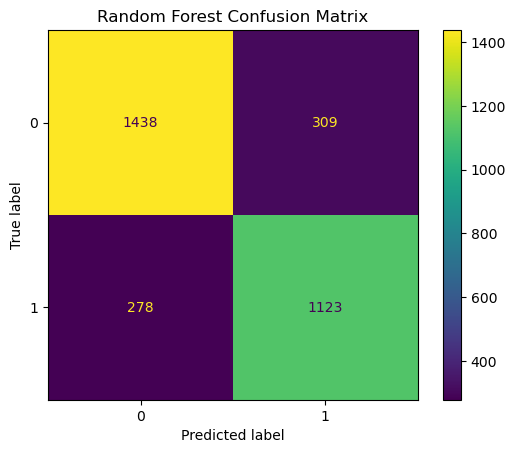

In [84]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm_rf = confusion_matrix(y_test, y_pred_dt)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()